### Trying to make perceptorn from scratch

In [325]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [326]:
def generate_data(n_samples, noise_std):
    x = np.random.uniform(-1, 1, n_samples)
    y = np.random.uniform(-1, 1, n_samples)
    target = np.zeros(n_samples)
    
    for i in range(n_samples):
        if x[i] * 2 + 1 < y[i]:
            target[i] = 1   
    
    return x, y, target

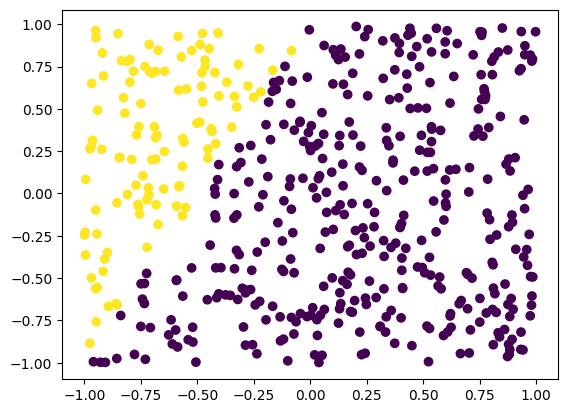

In [327]:
data = generate_data(600, 0.1)
X = pd.DataFrame({"x": data[0], "y": data[1]})
y = np.array(data[2])

plt.scatter(x=X["x"], y=X["y"], c=y)


In [328]:
y

array([0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.

In [329]:
class Perceptorn:
    def __init__(self, learning_rate=0.01):
        self.b = np.random.uniform(-1, 1, [1,1])
        self.learning_rate = learning_rate
        
    def activation(self, total):
        return 1 if total >= 0 else 0

    def fit(self, X, y, epoch=100):
        self.w = np.random.uniform(-1, 1, [len(X.columns), ])
        
        for i in range(epoch):
            
            for index, row in X.iterrows():
                total = np.sum(row * self.w) + self.b
                yy = self.activation(total) 
                for i, _ in enumerate(row):
                    ww = self.learning_rate * (y[index] - yy) * row[i]
                    self.w[i] += [ww]
                self.b += self.learning_rate * (y[index] - yy)
        print("Fit end")
    
    def predict(self, X):  
        t = np.sum(np.array(X) * self.w) + self.b
        res = np.zeros(len(X))
        for i, e in enumerate(t):
           res[i] = self.activation(e)
        return res
    def weights(self):
        return self.w, self.b
        
per = Perceptorn()
per.fit(X, y)
per.predict(X)


C:\Users\yardz\AppData\Local\Temp\ipykernel_12240\1761762620.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ww = self.learning_rate * (y[index] - yy) * row[i]
C:\Users\yardz\AppData\Local\Temp\ipykernel_12240\1761762620.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w[i] += [ww]


Fit end


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [330]:
from sklearn.metrics import accuracy_score
accuracy_score(y, per.predict(X))

0.78

In [332]:
from sklearn.linear_model import Perceptron
pp = Perceptorn()
pp.fit(X, y)
accuracy_score(y, pp.predict(X))

C:\Users\yardz\AppData\Local\Temp\ipykernel_12240\1761762620.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ww = self.learning_rate * (y[index] - yy) * row[i]
C:\Users\yardz\AppData\Local\Temp\ipykernel_12240\1761762620.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.w[i] += [ww]


Fit end


0.78

In [331]:
per.weights()


(array([-0.64826001,  0.31917576]), array([[-0.32311393]]))